In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import PIL
import os
from PIL import Image, ImageOps
import glob
import cv2

In [3]:
import os, re, glob, cv2, numpy as np

dirs = os.listdir('/content/drive/MyDrive/Dataset_CNN/Augmentasi/kupu_kupu/rotate')
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob('/content/drive/MyDrive/Dataset_CNN/Augmentasi/kupu_kupu/rotate/'+i+'/*'):
        im = cv2.imread(pic)
        im = cv2.resize(im,(224,224))
        im = np.array(im)
        count = count + 1
        X.append(im)
        y.append(label)
        if(count <= 10):
            im_arr.append({str(i):im})
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)
X = np.array(X)
y = np.array(y);

Jumlah kupu_batik_cap : 200
Jumlah kupu_hijau_biru : 200
Jumlah kupu_jarak : 200
Jumlah kupu_jojo : 200
Jumlah kupu_pantat_merah : 200
Jumlah kupu_raja_helena : 200
Jumlah kupu_raja_limau : 200
Jumlah kupu_harimau_kuning_hijau : 200


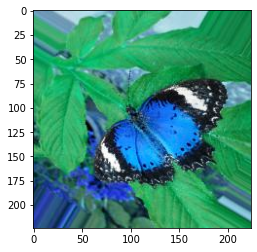

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[1])

In [4]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.70, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_other, y_other, test_size=0.666, random_state=42)
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255
y_train = to_categorical(y_train, len(dirs))
y_valid = to_categorical(y_valid, len(dirs))
y_test = to_categorical(y_test, len(dirs))
print("Found "+str(X_train.shape[0])+" trained image filenames belonging "+str(len(dirs))+" class")
print("Found "+str(X_valid.shape[0])+" validated image filenames belonging "+str(len(dirs))+" class")
print("Found "+str(X_test.shape[0])+" tested image filenames belonging "+str(len(dirs))+" class")

Found 1120 trained image filenames belonging 8 class
Found 160 validated image filenames belonging 8 class
Found 320 tested image filenames belonging 8 class


In [5]:
input_shape = (224, 224, 3)
base_model=tf.keras.applications.MobileNet(input_shape=input_shape,
                                           include_top=False,
                                           weights='imagenet')

17225924/17225924 [==============================] - 0s 0us/step


In [6]:

base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [7]:

model = tf.keras.Sequential([
                             base_model,
                             tf.keras.layers.Conv2D(32,3, activation='relu'),
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dense(8,activation='softmax')
])



In [10]:
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau
import h5py
from sklearn.model_selection import train_test_split
epochs =100
erl_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
mod_chk= ModelCheckpoint(filepath='/content/drive/MyDrive/Dataset_CNN/butterfly_model.hdf5',monitor='val_loss',save_best_only=True)
lrate= ReduceLROnPlateau(monitor='val_loss', patience=3 , factor=0.1)
model.compile("adam",loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 32)          294944    
                                                                 
 global_average_pooling2d (G  (None, 32)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
Total params: 3,524,072
Trainable params: 3,502,184
Non-trainable params: 21,888
_________________________________________________________________


In [13]:
#tanpa augmentasi
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32,
                    shuffle=True,
                    callbacks=[erl_stop,mod_chk,lrate])
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/100
35/35 [==============================] - 295s 8s/step - loss: 0.3393 - accuracy: 0.9143 - val_loss: 5.1014 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/100
35/35 [==============================] - 257s 7s/step - loss: 0.1078 - accuracy: 0.9768 - val_loss: 3.5763 - val_accuracy: 0.6156 - lr: 0.0010
Epoch 3/100
35/35 [==============================] - 263s 8s/step - loss: 0.0920 - accuracy: 0.9714 - val_loss: 5.2051 - val_accuracy: 0.6375 - lr: 0.0010
Epoch 4/100
35/35 [==============================] - 263s 7s/step - loss: 0.0690 - accuracy: 0.9866 - val_loss: 2.9055 - val_accuracy: 0.7781 - lr: 0.0010
Epoch 5/100
35/35 [==============================] - 263s 8s/step - loss: 0.0091 - accuracy: 0.9982 - val_loss: 1.8932 - val_accuracy: 0.7406 - lr: 0.0010
Epoch 6/100
35/35 [==============================] - 260s 7s/step - loss: 0.0313 - accuracy: 0.9937 - val_loss: 0.8247 - val_accuracy: 0.8656 - lr: 0.0010
Epoch 7/100
35/35 [==============================] - 261s 7s/step - lo

In [14]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1,)

print('\nTest accuracy:', test_acc)

10/10 [==============================] - 13s 1s/step - loss: 3.3584e-04 - accuracy: 1.0000

Test accuracy: 1.0


In [ ]:
train_loss, train_acc = model.evaluate(X_train,  y_train, verbose=1)

print('\nTrain accuracy:', train_acc)

35/35 [==============================] - 36s 1s/step - loss: 2.2042e-06 - accuracy: 1.0000

Train accuracy: 1.0


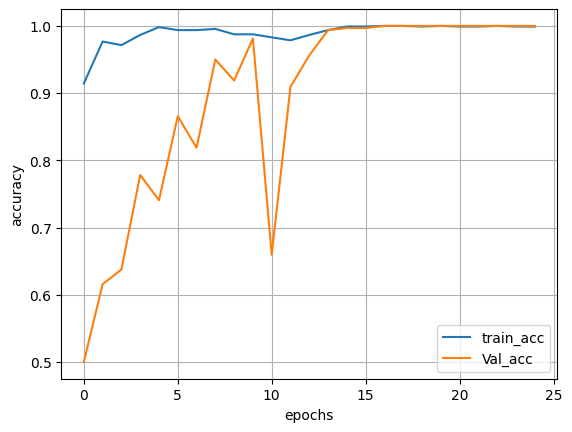

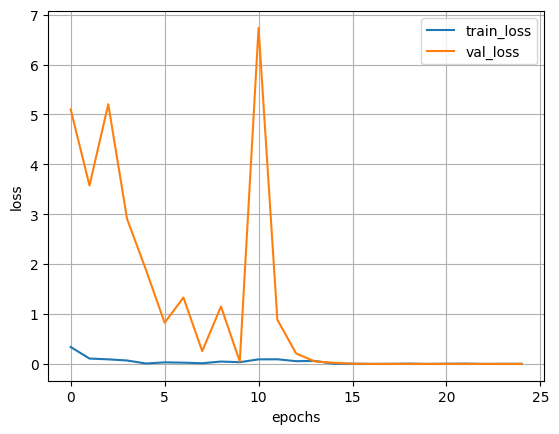

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],label="train_acc")
plt.plot(history.history["val_accuracy"],label="Val_acc")
plt.grid()
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.grid()
plt.legend()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [17]:
y_pred = model.predict(X_test)

10/10 [==============================] - 14s 1s/step


In [18]:
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test_n, y_prediction_n,
                            target_names=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"]))

                           precision    recall  f1-score   support

kupu_harimau_kuning_hijau       1.00      1.00      1.00        37
         kupu_raja_helena       1.00      1.00      1.00        50
          kupu_hijau_biru       1.00      1.00      1.00        40
           kupu_batik_cap       1.00      1.00      1.00        39
               kupu_jarak       1.00      1.00      1.00        33
          kupu_raja_limau       1.00      1.00      1.00        38
                kupu_jojo       1.00      1.00      1.00        45
        kupu_pantat_merah       1.00      1.00      1.00        38

                 accuracy                           1.00       320
                macro avg       1.00      1.00      1.00       320
             weighted avg       1.00      1.00      1.00       320



In [20]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred


10/10 [==============================] - 14s 1s/step


array([4, 7, 3, 7, 4, 1, 0, 6, 5, 7, 3, 4, 2, 0, 0, 2, 7, 4, 7, 1, 2, 3,
       6, 6, 4, 4, 1, 3, 3, 2, 2, 5, 1, 6, 6, 0, 4, 6, 6, 1, 6, 1, 5, 5,
       0, 3, 1, 7, 7, 5, 2, 7, 1, 2, 6, 3, 6, 4, 3, 6, 1, 0, 7, 7, 1, 3,
       3, 3, 7, 1, 7, 7, 5, 4, 3, 1, 4, 6, 6, 5, 5, 0, 1, 0, 5, 1, 7, 1,
       6, 7, 2, 4, 4, 2, 5, 1, 7, 0, 5, 7, 6, 3, 6, 0, 7, 1, 7, 7, 6, 2,
       1, 1, 7, 0, 5, 2, 5, 0, 1, 0, 4, 3, 3, 1, 1, 7, 6, 4, 4, 1, 3, 4,
       1, 1, 6, 5, 1, 7, 1, 0, 0, 7, 6, 0, 2, 1, 7, 4, 5, 3, 6, 5, 4, 1,
       0, 3, 3, 2, 2, 1, 2, 2, 5, 0, 2, 2, 2, 6, 3, 0, 1, 7, 5, 1, 2, 5,
       3, 3, 5, 3, 2, 1, 5, 6, 3, 2, 0, 6, 3, 5, 1, 6, 5, 4, 1, 6, 4, 3,
       6, 2, 2, 2, 7, 0, 1, 2, 4, 6, 6, 2, 7, 3, 2, 4, 6, 6, 0, 1, 7, 2,
       1, 6, 5, 7, 2, 6, 4, 5, 1, 7, 7, 5, 2, 0, 4, 6, 1, 4, 2, 0, 3, 0,
       6, 0, 6, 1, 3, 1, 2, 6, 3, 0, 5, 3, 7, 3, 0, 3, 1, 0, 0, 0, 4, 1,
       3, 2, 5, 3, 1, 6, 6, 5, 6, 0, 6, 1, 1, 0, 2, 5, 0, 3, 1, 5, 2, 7,
       4, 6, 0, 2, 7, 6, 5, 0, 5, 3, 6, 5, 4, 3, 3,

In [21]:
y_test_class = np.argmax(y_test, axis=1)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

1.0


array([[37,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38]])

<Axes: >

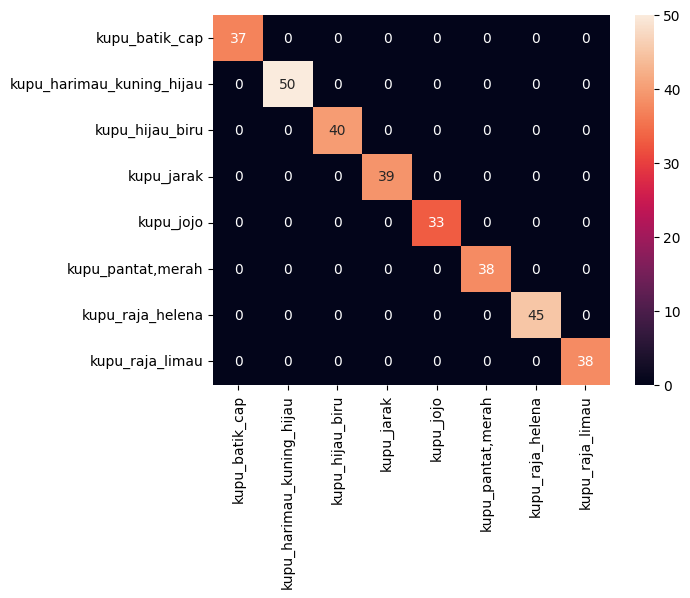

In [24]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["kupu_batik_cap",
                                          "kupu_harimau_kuning_hijau",
                                          "kupu_hijau_biru",
                                          "kupu_jarak",
                                          "kupu_jojo",
                                          "kupu_pantat,merah",
                                          "kupu_raja_helena",
                                          "kupu_raja_limau"],
           yticklabels=["kupu_batik_cap",
                                          "kupu_harimau_kuning_hijau",
                                          "kupu_hijau_biru",
                                          "kupu_jarak",
                                          "kupu_jojo",
                                          "kupu_pantat,merah",
                                          "kupu_raja_helena",
                                          "kupu_raja_limau"])

In [25]:
y_pred = model.predict(X_valid)
y_prediction_n = []
y_valid_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_valid[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_valid[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_valid_n.append(index_m)

5/5 [==============================] - 12s 3s/step


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_valid_n, y_prediction_n, target_names=["Kupu Batik Cap",
                                                                     "Kupu Harimau Kuning Hijau", "Kupu Hijau Biru",
                                                                     "Kupu Jarak", "Kupu Jojo", "Kupu Pantat Merah",
                                                                     "Kupu Raja Helena", "Kupu Raja Limau"]))

                           precision    recall  f1-score   support

           Kupu Batik Cap       1.00      1.00      1.00        20
Kupu Harimau Kuning Hijau       1.00      1.00      1.00        18
          Kupu Hijau Biru       1.00      1.00      1.00        29
               Kupu Jarak       1.00      1.00      1.00        18
                Kupu Jojo       1.00      1.00      1.00        14
        Kupu Pantat Merah       1.00      1.00      1.00        23
         Kupu Raja Helena       1.00      1.00      1.00        24
          Kupu Raja Limau       1.00      1.00      1.00        14

                 accuracy                           1.00       160
                macro avg       1.00      1.00      1.00       160
             weighted avg       1.00      1.00      1.00       160

